#This code assesses efficiency of Random Forest in classifying pole moves based on landmarks.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
dataFrame = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/pole_poses_no_outliers_csvs_out.csv')
dataFrame.head
#image name/ class/ features

<bound method NDFrame.head of         scissor0.jpg  scissorSit  2006.8503   1624.0208   -1593.3456  \
0       scissor1.jpg  scissorSit  881.01940   465.64685 -1102.504800   
1      scissor10.jpg  scissorSit  871.43475   346.31360  -371.125520   
2     scissor100.jpg  scissorSit  723.19904   717.09906   344.332240   
3     scissor103.jpg  scissorSit  549.72577   701.38980  -650.752800   
4     scissor105.jpg  scissorSit  515.79614   731.90936  -343.087800   
..               ...         ...        ...         ...          ...   
303  butterfly95.jpg   butterfly  631.13680  1186.53310  -155.513810   
304  butterfly96.jpg   butterfly  590.69550  1175.36610    35.266754   
305  butterfly97.jpg   butterfly  647.99646  1154.53630  -223.326800   
306  butterfly98.jpg   butterfly  682.30255  1119.04960  -431.599900   
307  butterfly99.jpg   butterfly  660.48816  1113.01890  -230.266570   

     2072.7856   1626.0464   -1594.366  2084.7407    1639.284  ...  \
0    913.37900   472.28815 -1108.68

In [ ]:
import numpy as np
from sklearn import preprocessing
#get labels
labels = dataFrame.iloc[:,1]

#code labels
le = preprocessing.LabelEncoder()
le.fit(labels)

numLabels = le.transform(labels)
print(np.unique(numLabels))
print(le.classes_)
features = dataFrame.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


# Random Forests

In [ ]:
from sklearn import ensemble

#enter forests with numberss of trees wishing to evaluate here
treeNo = [5,10,50,100,1000,10000]

forests = []
i = 0 #iterator

#add forests of different sizes to 'forests' list
for tree in treeNo:
  ranForest = ensemble.RandomForestClassifier(n_estimators=treeNo[i], min_samples_leaf=10, max_depth=None)
  forests.append(ranForest)
  i = i+1


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

i = 0 #iterator


#kfolds
kf = KFold(n_splits=10, random_state = 1, shuffle=True)

fResults = []
#get accuracy  Scores in all kfolds per tree
for forest in forests:
  f = np.mean(cross_val_score(forest, features, numLabels, cv=kf))
  fResults.append(f)
  print(str(treeNo[i]),'trees accuracy score:', f)
  i = i+1

#find best tree result
#get index
bestAcc = (np.where(fResults == np.max(fResults)))[0][0]

#print best score
print('Best Forest:', str(treeNo[bestAcc]), 'trees', 'with an accuracy of', np.max(fResults))

5 trees accuracy score: 0.8477419354838709
10 trees accuracy score: 0.8345161290322579
50 trees accuracy score: 0.873225806451613
100 trees accuracy score: 0.8700000000000001
1000 trees accuracy score: 0.8635483870967742
10000 trees accuracy score: 0.8700000000000001
Best Forest: 50 trees with an accuracy of 0.873225806451613


In [ ]:
#split data 30% test 70% train (For best tree confusion matrix)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, numLabels, test_size=0.3)

50 trees accuracy score: 0.8602150537634409
[[41  1  0]
 [ 1 16  3]
 [ 3  5 23]]


Text(69.0, 0.5, 'True Label')

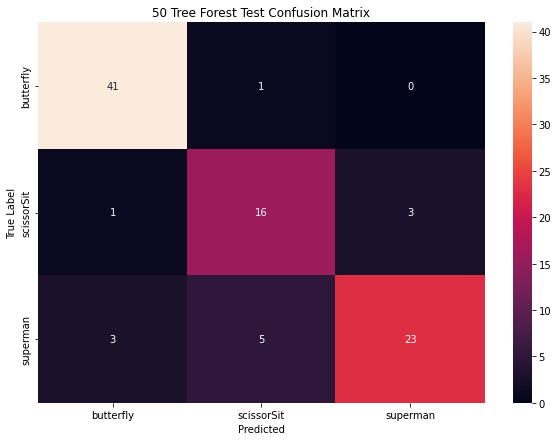

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#get predictions of best Tree
forests[bestAcc].fit(X_train,y_train)
y_pred = forests[bestAcc].predict(X_test)
title = str(treeNo[bestAcc]) + " Tree Forest Test Confusion Matrix"

print(str(treeNo[bestAcc]),'trees accuracy score:', str(accuracy_score(y_test,y_pred)))

#confusion matrix
classLabels = le.classes_
the_matrix = confusion_matrix(y_pred, y_test, labels=np.unique(numLabels))
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')
#cfm_plot.figure.savefig("cfm.png")

#Completely OOS 

In [ ]:
oosTestdf = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/poleTestCsvOut.csv',header=None)

In [ ]:
#get labels
testlabels = oosTestdf.iloc[:,1]

#code labels
leT = preprocessing.LabelEncoder()
leT.fit(labels)

testNumLabels = leT.transform(testlabels)
print(np.unique(testNumLabels))
print(leT.classes_)
testFeatures = oosTestdf.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


[[31  0  1]
 [ 0 10  4]
 [ 0 19  7]]
50 Tree Forest OOS Accuracy: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(69.0, 0.5, 'True Label')

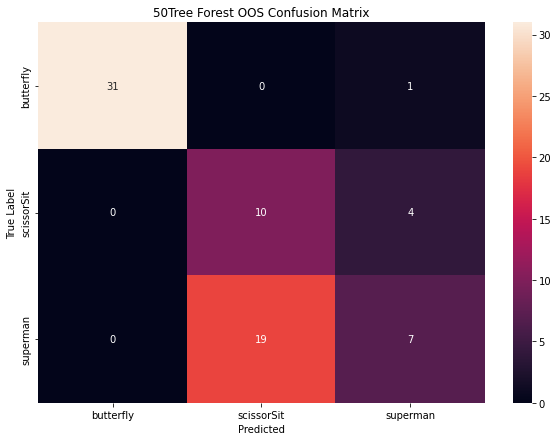

In [ ]:
#ANN OOS
y_pred = forests[bestAcc].predict(testFeatures)
title = str(treeNo[bestAcc]) + "Tree Forest OOS Confusion Matrix"

#confusion matrix
classLabels = leT.classes_
the_matrix = confusion_matrix(y_pred, testNumLabels, labels=np.unique(testNumLabels))
print(the_matrix)

print(str(treeNo[bestAcc]), "Tree Forest OOS Accuracy:", str(accuracy_score(testNumLabels, y_pred)))

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')